In [1]:
import numpy as np
import os
import pandas as pd
import openpyxl
from openpyxl import load_workbook
from itertools import *
import matplotlib.pyplot as plt

# 1. Load Data

In [2]:
#Load data from xlsx
file_path = 'Dataset/VC_E/uuid_dir_with_rankings.xlsx'
wb = load_workbook(file_path) 
uuid = wb.sheetnames[0]
ws = wb[uuid]

In [3]:
#Convert data to Pandas dataframe
data = ws.values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df = pd.DataFrame(data, index=idx, columns=cols)

In [4]:
#Display data
df.head()

,short_id,directory,VC,VC - Investment # rank,VC - Investment $ rank,E - Employees (Log),E - VC Raised (log),E - VC Rds,E - Total Raised (log),E - Total Rds,E - IPO
69e7be12-7b53-5a66-e93c-f691d97e48a7,vc1,vc0,True,0.193725,0.246069,,NaN,NaN,NaN,NaN,NaN
4b7fc2e7-4ace-cecd-a937-fd1d572b1cd8,vc2,vc0,True,0.459014,0.233457,,NaN,NaN,NaN,NaN,NaN
dc7c4f37-4cd7-0e26-c7d6-16ba8ac419d4,vc3,vc0,True,0.459014,0.233457,,NaN,NaN,NaN,NaN,NaN
b7f7a76b-b715-bdd6-421a-d3a176254f9d,vc4,vc0,True,0.064119,0.073312,,NaN,NaN,NaN,NaN,NaN
3606a0f9-bf2b-760a-2884-987898008183,vc5,vc0,True,0.064119,0.073312,,NaN,NaN,NaN,NaN,NaN


In [5]:
#Separate VC and Entrepreneurs data
vc = df.groupby('VC').get_group(True)
e = df.groupby('VC').get_group(False)

In [6]:
e.head()

,short_id,directory,VC,VC - Investment # rank,VC - Investment $ rank,E - Employees (Log),E - VC Raised (log),E - VC Rds,E - Total Raised (log),E - Total Rds,E - IPO
d4d908d3-5738-c583-9ecc-78fa4a7d977e,e1,e0,False,NaN,NaN,,0.0,0.0,0.000000,0.0,0.0
fa1afbe2-9995-20ee-0c41-3886ee3fdfc4,e2,e0,False,NaN,NaN,0.477121,0.0,0.0,6.235641,3.0,0.0
ce695f82-fa7b-b0f9-2e6a-f6a66dc4dbc2,e3,e0,False,NaN,NaN,2.549,0.0,0.0,0.000000,0.0,0.0
437e2d92-da93-6dab-4324-39721fcc59e7,e4,e0,False,NaN,NaN,0.477121,0.0,0.0,0.000000,0.0,0.0
57854bf4-5cc2-6689-d2ff-41f8961c26ec,e5,e0,False,NaN,NaN,,0.0,0.0,0.000000,0.0,0.0


In [7]:
vc.head()

,short_id,directory,VC,VC - Investment # rank,VC - Investment $ rank,E - Employees (Log),E - VC Raised (log),E - VC Rds,E - Total Raised (log),E - Total Rds,E - IPO
69e7be12-7b53-5a66-e93c-f691d97e48a7,vc1,vc0,True,0.193725,0.246069,,NaN,NaN,NaN,NaN,NaN
4b7fc2e7-4ace-cecd-a937-fd1d572b1cd8,vc2,vc0,True,0.459014,0.233457,,NaN,NaN,NaN,NaN,NaN
dc7c4f37-4cd7-0e26-c7d6-16ba8ac419d4,vc3,vc0,True,0.459014,0.233457,,NaN,NaN,NaN,NaN,NaN
b7f7a76b-b715-bdd6-421a-d3a176254f9d,vc4,vc0,True,0.064119,0.073312,,NaN,NaN,NaN,NaN,NaN
3606a0f9-bf2b-760a-2884-987898008183,vc5,vc0,True,0.064119,0.073312,,NaN,NaN,NaN,NaN,NaN


# 2. Load Images and labels

In [8]:
import skimage
import skimage.io
import skimage.transform
vgg_mean = [103.939, 116.779, 123.68]
# https://github.com/machrisaa/tensorflow-vgg/blob/master/utils.py
def load_image(image_path, mean=vgg_mean):
    image = skimage.io.imread(image_path)

    image = image.astype(float)
    
    short_edge = min(image.shape[:2])
    yy = int((image.shape[0] - short_edge) / 2)
    xx = int((image.shape[1] - short_edge) / 2)
    crop_image = image[yy: yy + short_edge, xx: xx + short_edge]
    
    resized_image = skimage.transform.resize(crop_image, (224, 224), mode='constant') 
            
    bgr = resized_image[:,:,::-1] - mean
    
    return bgr

In [9]:
img_list = []
e_dir = 'impression_personality/Cleaning/Extracted_Faces/e'
subdir_list = os.listdir(e_dir)[1:]
y = []
labels = []
for i in range(16):
    subdir = 'e' + str(i)
    e_subdir = e.groupby('directory').get_group(subdir)
    id_list = e_subdir['short_id']
    for j in range(len(id_list)):
        short_id = id_list[j]
        img_path = os.path.join(e_dir, subdir, 'cropped_photos', short_id + '_cb.jpeg')
        if not os.path.isfile(img_path):
            continue
        img = load_image(str(img_path))
        img_list.append(img)
        row = e_subdir.loc[e_subdir['short_id']==short_id]
        total_raised = float(row['E - Total Raised (log)'])
        y.append(total_raised)
        if total_raised > 0:
            labels.append(1)
        else:
            labels.append(0)

In [10]:
train_size = int(0.8 * len(img_list))
train_img_list = img_list[:train_size]
test_img_list = img_list[train_size:]
test_size = len(test_img_list)

In [11]:
train_labels = np.zeros((train_size, 2))
test_labels = np.zeros((test_size, 2))

In [12]:
y_train = labels[:train_size]
y_test = labels[train_size:]
for i in range(train_size):
    train_labels[i, y_train[i]] = 1
for i in range(test_size):
    test_labels[i, y_test[i]] = 1

In [13]:
test_labels.shape

(1593, 2)

In [14]:
img_array = np.zeros((len(img_list), 224, 224, 3))
for i in range(len(img_list)):
    img_array[i, :, :, :] = img_list[i]
train_img_array = img_array[:train_size, :, :, :]
test_img_array = img_array[train_size:, :, :, :]

In [15]:
print("Training set: {0} Images".format(train_size))
print("Test set: {0} Images".format(test_size))

Training set: 6369 Images
Test set: 1593 Images


# 3. Extract VGG-16 features (fc6)

In [16]:
#Define VGG-16 class
import tensorflow as tf

class Vgg16Model:
    def __init__(self, weights_path='./vgg16.npy'):
        self.weights = np.load('vgg16.npy', encoding='latin1').item()
        self.activation_fn = tf.nn.relu
        self.conv_padding = 'SAME'
        self.pool_padding = 'SAME'
        self.use_bias = True

    def build(self, input_tensor, trainable=False):
        self.conv1_1 = self.conv2d(input_tensor, 'conv1_1', 64, trainable)
        self.conv1_2 = self.conv2d(self.conv1_1, 'conv1_2', 64, trainable)

        # Max-pooling is performed over a 2 × 2 pixel window, with stride 2.
        self.max_pool1 = tf.layers.max_pooling2d(self.conv1_2, (2, 2), (2, 2), padding=self.pool_padding)

        self.conv2_1 = self.conv2d(self.max_pool1, 'conv2_1', 128, trainable)
        self.conv2_2 = self.conv2d(self.conv2_1, 'conv2_2', 128, trainable)

        self.max_pool2 = tf.layers.max_pooling2d(self.conv2_2, (2, 2), (2, 2), padding=self.pool_padding)

        self.conv3_1 = self.conv2d(self.max_pool2, 'conv3_1', 256, trainable)
        self.conv3_2 = self.conv2d(self.conv3_1, 'conv3_2', 256, trainable)
        self.conv3_3 = self.conv2d(self.conv3_2, 'conv3_3', 256, trainable)

        self.max_pool3 = tf.layers.max_pooling2d(self.conv3_3, (2, 2), (2, 2), padding=self.pool_padding)

        self.conv4_1 = self.conv2d(self.max_pool3, 'conv4_1', 512, trainable)
        self.conv4_2 = self.conv2d(self.conv4_1, 'conv4_2', 512, trainable)
        self.conv4_3 = self.conv2d(self.conv4_2, 'conv4_3', 512, trainable)

        self.max_pool4 = tf.layers.max_pooling2d(self.conv4_3, (2, 2), (2, 2), padding=self.pool_padding)

        self.conv5_1 = self.conv2d(self.max_pool4, 'conv5_1', 512, trainable)
        self.conv5_2 = self.conv2d(self.conv5_1, 'conv5_2', 512, trainable)
        self.conv5_3 = self.conv2d(self.conv5_2, 'conv5_3', 512, trainable)

        self.max_pool5 = tf.layers.max_pooling2d(self.conv5_3, (2, 2), (2, 2), padding=self.pool_padding)

        reshaped = tf.reshape(self.max_pool5, shape=(-1, 7 * 7 * 512))

        self.fc6 = self.fc(reshaped, 'fc6', 4096, trainable)
        self.fc7 = self.fc(self.fc6, 'fc7', 4096, trainable)

        self.fc8 = self.fc(self.fc7, 'fc8', 1000, trainable)

        self.predictions = tf.nn.softmax(self.fc8, name='predictions')

    def conv2d(self, layer, name, n_filters, trainable, k_size=3):
        return tf.layers.conv2d(layer, n_filters, kernel_size=(k_size, k_size),
                                activation=self.activation_fn, padding=self.conv_padding, name=name, trainable=trainable,
                                kernel_initializer=tf.constant_initializer(self.weights[name][0], dtype=tf.float32),
                                bias_initializer=tf.constant_initializer(self.weights[name][1], dtype=tf.float32),
                                use_bias=self.use_bias)

    def fc(self, layer, name, size, trainable):
        return tf.layers.dense(layer, size, activation=self.activation_fn,
                               name=name, trainable=trainable,
                               kernel_initializer=tf.constant_initializer(self.weights[name][0], dtype=tf.float32),
                               bias_initializer=tf.constant_initializer(self.weights[name][1], dtype=tf.float32),
                               use_bias=self.use_bias)



/anaconda3/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
#Extract VGG-16 features
def extract_codes(img_array, batch_size=32):
    tf.reset_default_graph()
    num_batches = img_array.shape[0]//batch_size
    codes_fc6 = []
    codes_fc7 = []
    if img_array.shape[0] % batch_size != 0:
        num_batches += 1
    with tf.Session(graph = tf.Graph()) as sess:    
        _input = tf.placeholder(tf.float32, shape=(None, 224, 224, 3), name="images")
        vgg = Vgg16Model()
        vgg.build(_input)
        sess.run(tf.global_variables_initializer())
        for i in range(num_batches):
            if (i+1)*batch_size < img_array.shape[0]:
                img_input = img_array[i*batch_size:(i+1)*batch_size]
            else:
                img_input = img_array[i*batch_size:]
            batch_codefc6, batch_codefc7 = sess.run([vgg.fc6, vgg.fc7], feed_dict={ _input: img_input })
            print(i)
            for j in range(len(batch_codefc6)):
                codes_fc6.append(batch_codefc6[j])
                codes_fc7.append(batch_codefc7[j])
        #if img_array.shape[0] % batch_size != 0:
         #   img_input = img_array[i*batch_size:]
          #  batch_codefc6, batch_codefc7 = sess.run([vgg.fc6, vgg.fc7], feed_dict={ _input: img_input })
           # for j in range(len(batch_codefc6)):
            #    codes_fc6.append(batch_codefc6[j])
             #   codes_fc7.append(batch_codefc7[j])
        return codes_fc6, codes_fc7

In [31]:
#Extract and save test set features
test_fc6, test_fc7 = extract_codes(test_img_array)
np.save('test_codes_fc6.npy', test_fc6)
np.save('test_codes_fc7.npy', test_fc7)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [32]:
test_size

1593

In [33]:
len(test_fc6)

1593

In [50]:
#Extract and save training set features
train_fc6, train_fc7 = extract_codes(train_img_array)
np.save('train_codes_fc6.npy', train_fc6)
np.save('train_codes_fc7.npy', train_fc7)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [53]:
len(train_fc6)

6369

In [18]:
#Load saved features
training_codes = np.load('train_codes_fc6.npy')
test_codes = np.load('test_codes_fc6.npy')

# 4. Transfer Learning Step - Use a small NN with a single hidden layer

In [19]:
training_input = np.reshape(training_codes, (train_size, 4096))
test_input = np.reshape(test_codes, (test_size, 4096))

In [20]:
#Dimensionality reduction of training codes using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, svd_solver='full')
pca = pca.fit(training_input)
training_input_reduced = pca.transform(training_input)
test_input_reduced = pca.transform(test_input)

In [21]:
test_input_reduced.shape

(1593, 1716)

In [22]:
def get_batches(x, y, batch_size=32):
    num_rows = y.shape[0]
    
    num_batches = num_rows // batch_size
    
    #if num_rows % batch_size != 0:
     #   num_batches = num_batches + 1

    for batch in range(num_batches):
        yield x[batch_size * batch: batch_size * (batch + 1)], y[batch_size * batch: batch_size * (batch + 1)]

In [42]:
import os
import time

from tensorflow.python.saved_model import builder as saved_model_builder
from tensorflow.python.saved_model.signature_def_utils import predict_signature_def

from tensorflow.python.saved_model.tag_constants import SERVING
from tensorflow.python.saved_model.signature_constants import DEFAULT_SERVING_SIGNATURE_DEF_KEY
from tensorflow.python.saved_model.signature_constants import PREDICT_INPUTS
from tensorflow.python.saved_model.signature_constants import PREDICT_OUTPUTS

In [46]:
tf.reset_default_graph()

In [47]:
#if(os.path.exists(model_path)):
 #   raise Exception('directory "{}" already exists. Delete or move it'.format(model_path))

input_size = training_input_reduced.shape[1]
num_epochs = 20
learning_rate = 1e-5
keep_prob = 0.8
batch_size = 64
accuracy_print_steps = 10
iteration = 0
num_hidden_neurons = 64
train_acc_list = []
test_acc_list = []

#tf.reset_default_graph()

with tf.Session(graph=tf.Graph()) as sess:
        
    with tf.name_scope("inputs"):
        _images = tf.placeholder(tf.float32, shape=(None, input_size), name='images')
        _keep_prob = tf.placeholder(tf.float32, name='keep_probability')

    with tf.name_scope("targets"):
        _labels = tf.placeholder(tf.float32, shape=(None, 2), name='labels')
            
    with tf.name_scope("hidden_layer"):
        hidden_weights = tf.Variable(
                initial_value = tf.truncated_normal([input_size, num_hidden_neurons], mean=0.0, stddev=0.01),
                dtype=tf.float32, name="hidden_weights"
            )
            
        hidden_bias = tf.Variable(
                initial_value = tf.zeros(num_hidden_neurons), 
                dtype=tf.float32,
                name="hidden_bias"
            )
            
        hidden = tf.matmul(_images, hidden_weights) + hidden_bias
        hidden = tf.nn.relu(hidden, name="hidden_relu")
        hidden = tf.nn.dropout(hidden, keep_prob=_keep_prob, name='hidden_dropout')
            
        tf.summary.histogram("hidden_weights", hidden_weights)
        tf.summary.histogram("hidden_bias", hidden_bias)

            
    with tf.name_scope("outputs"):
        output_weights = tf.Variable(
                initial_value=tf.truncated_normal(shape=(num_hidden_neurons, 2), mean=0.0, stddev=0.01),
                dtype=tf.float32, name="output_weights"
            )
            
        output_bias = tf.Variable(initial_value=tf.zeros(2), dtype=tf.float32, name="output_bias")
            
        logits = tf.matmul(hidden, output_weights) + output_bias
        predictions = tf.nn.softmax(logits, name='predictions')
            
        tf.summary.histogram("output_weights", output_weights)
        tf.summary.histogram("output_bias", output_bias)
        tf.summary.histogram("predictions", predictions)
    
    with tf.name_scope("cost"):
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=_labels, name='cross_entropy')
        cost = tf.reduce_mean(cross_entropy, name='cost')
            
        tf.summary.scalar("cost", cost)

    with tf.name_scope("train"):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
        correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(_labels, 1), name='correct_predictions')
        accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32), name='accuracy')

    ### merge summaries
    merged_summaries = tf.summary.merge_all()
        
    ###  Save training and validation logs for tensorboard
    #train_writer = tf.summary.FileWriter('./logs/train/{}'.format(model_version), sess.graph)
    #val_writer = tf.summary.FileWriter('./logs/val/{}'.format(model_version))
        
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        for batch_train_images, batch_train_labels in get_batches(training_input_reduced, train_labels, batch_size=batch_size):
            train_loss, _, p, summary = sess.run(
                    [cost, optimizer, logits, merged_summaries], 
                    feed_dict = { 
                        _images: batch_train_images,
                        _labels: batch_train_labels,
                        _keep_prob: keep_prob
                    })
        #print(train_loss)
            #train_writer.add_summary(summary, iteration)
                
            #iteration = iteration + 1

            #if iteration % accuracy_print_steps == 0:
        train_acc, train_summary = sess.run([accuracy, merged_summaries], feed_dict ={
                        _images: training_input_reduced,
                        _labels: train_labels,
                        _keep_prob: 1.
                    })
        test_acc, test_summary = sess.run([accuracy, merged_summaries], feed_dict ={
                        _images: test_input_reduced,
                        _labels: test_labels,
                        _keep_prob: 1.
                    })
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

            #val_writer.add_summary(val_summary, iteration)
        print('Training : {} / {} Accuracy: {} Loss: {}'.format(epoch + 1, num_epochs, train_acc, train_loss))
        print('Test: Accuracy: {0}'.format(test_acc))
        
                

        
        ### Save graph and trained variables
    #builder = saved_model_builder.SavedModelBuilder(model_path)

Training : 1 / 20 Accuracy: 0.55409014225 Loss: 0.686146616936
Test: Accuracy: 0.548022627831
Training : 2 / 20 Accuracy: 0.596639990807 Loss: 0.676627159119
Test: Accuracy: 0.586942851543
Training : 3 / 20 Accuracy: 0.615638256073 Loss: 0.672445416451
Test: Accuracy: 0.605147540569
Training : 4 / 20 Accuracy: 0.62160462141 Loss: 0.667783200741
Test: Accuracy: 0.607030749321
Training : 5 / 20 Accuracy: 0.620505571365 Loss: 0.662076950073
Test: Accuracy: 0.612052738667
Training : 6 / 20 Accuracy: 0.621447622776 Loss: 0.660847008228
Test: Accuracy: 0.615191459656
Training : 7 / 20 Accuracy: 0.621290624142 Loss: 0.655509710312
Test: Accuracy: 0.614563703537
Training : 8 / 20 Accuracy: 0.621133625507 Loss: 0.652497708797
Test: Accuracy: 0.614563703537
Training : 9 / 20 Accuracy: 0.620976626873 Loss: 0.648908615112
Test: Accuracy: 0.614563703537
Training : 10 / 20 Accuracy: 0.620976626873 Loss: 0.640359282494
Test: Accuracy: 0.614563703537
Training : 11 / 20 Accuracy: 0.620976626873 Loss: 0

In [48]:
import matplotlib.pyplot as plt

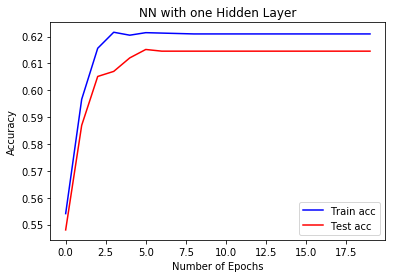

In [51]:
x = np.arange(num_epochs)
plt.plot(x, train_acc_list, 'b-', label='Train acc')
plt.plot(x, test_acc_list, 'r-', label='Test acc')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('NN with one Hidden Layer')
plt.legend(loc='lower right')
plt.show()

In [60]:
import cPickle

In [61]:
var_dict = {}
var_dict['training_input'] = training_input
var_dict['test_input'] = test_input
var_dict['train_labels'] = train_labels
var_dict['test_labels'] = test_labels
with open('pickle.pkl', 'w') as f:
    cPickle.dump(var_dict, f)